___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



In [1]:
# Elimizde ulusal bir orman bölgesine ait veriler var. Bu bölgenin özellikleri var
# Normalde data 600.000 satır. Sınıflar dengeli olsun diye 250.000 satıra düşürdük
# SVM, Decision Tree, Random Forest ve XGboost uygulayacağız

---
---

# 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [3]:
tree = pd.read_csv("treetypes39k.csv")
tree.head()

# Elevation : Rakım
# Slope Eğim
# Horizon.... : Su kaynaklarına yatay uzaklık
# ertical_Distance_To_Hydrolog : Su kaynaklarına dikey uzaklık
# Hillshade_9am	Hillshade_Noon	 : Gölgelerin RGB kodları
# Horizontal_Distance_To_Fire_Points: Yangın noktalarına yatay uzaklık
# Soil types: Toprak türleri
# Cover_Type: Ağaç türleri(Sınıflandıracağımız kısım)

# One-hot encoding yapılmış veri
# Orion Hoca:Burada 250.000 satırla çalışıyoruz. Eğer bilgisayarınız güçlü değilse düşük datayla çalışabilirsiniz. Sonuçlar benzer gelecektir
# .. Küçük veri seti mevcut

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,3176,53,19,624,128,1620,227,195,94,3342,...,0,1,0,0,0,0,0,0,0,1
1,3221,77,11,626,46,4076,234,220,117,2761,...,0,0,0,0,0,0,0,0,0,1
2,3237,302,9,495,53,371,194,236,181,1784,...,0,0,0,0,0,0,0,0,0,1
3,3106,34,18,684,-65,4254,215,199,114,4325,...,0,0,0,0,0,0,0,0,0,1
4,3631,29,22,716,219,2851,206,186,107,1356,...,0,0,0,0,0,0,0,0,1,1


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39000 entries, 0 to 38999
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           39000 non-null  int64
 1   Aspect                              39000 non-null  int64
 2   Slope                               39000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    39000 non-null  int64
 4   Vertical_Distance_To_Hydrology      39000 non-null  int64
 5   Horizontal_Distance_To_Roadways     39000 non-null  int64
 6   Hillshade_9am                       39000 non-null  int64
 7   Hillshade_Noon                      39000 non-null  int64
 8   Hillshade_3pm                       39000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  39000 non-null  int64
 10  Wilderness_Area_1                   39000 non-null  int64
 11  Wilderness_Area_2                   39000 non-null  int64
 12  Wild

In [5]:
tree.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.00000,39000.000000,39000.000000,...,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000
mean,2776.971821,156.404128,15.955410,234.293872,50.269872,1802.455718,212.387128,219.25441,135.651231,1575.897718,...,0.047179,0.043872,0.001615,0.005949,0.000410,0.001692,0.044513,0.036692,0.025282,3.743590
std,410.535370,110.004416,8.250758,213.230302,60.799991,1379.395321,29.997096,22.27514,45.048324,1138.506006,...,0.212025,0.204812,0.040160,0.076899,0.020251,0.041103,0.206234,0.188008,0.156982,2.047137
min,1866.000000,0.000000,0.000000,0.000000,-139.000000,0.000000,30.000000,85.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2410.000000,64.000000,10.000000,67.000000,5.000000,787.000000,196.000000,207.00000,108.000000,765.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2801.000000,125.000000,15.000000,182.000000,32.000000,1379.000000,219.000000,223.00000,138.000000,1318.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3127.000000,261.000000,21.000000,336.000000,78.000000,2451.250000,235.000000,235.00000,167.000000,2075.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3856.000000,360.000000,50.000000,1390.000000,561.000000,7033.000000,254.000000,254.00000,251.000000,7111.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
for col in tree.columns:
    print("Column", col, "has", tree[col].nunique(), "unique values")

Column Elevation has 1804 unique values
Column Aspect has 361 unique values
Column Slope has 51 unique values
Column Horizontal_Distance_To_Hydrology has 1158 unique values
Column Vertical_Distance_To_Hydrology has 485 unique values
Column Horizontal_Distance_To_Roadways has 5634 unique values
Column Hillshade_9am has 184 unique values
Column Hillshade_Noon has 150 unique values
Column Hillshade_3pm has 250 unique values
Column Horizontal_Distance_To_Fire_Points has 4948 unique values
Column Wilderness_Area_1 has 2 unique values
Column Wilderness_Area_2 has 2 unique values
Column Wilderness_Area_3 has 2 unique values
Column Wilderness_Area_4 has 2 unique values
Column Soil_Type_1 has 2 unique values
Column Soil_Type_2 has 2 unique values
Column Soil_Type_3 has 2 unique values
Column Soil_Type_4 has 2 unique values
Column Soil_Type_5 has 2 unique values
Column Soil_Type_6 has 2 unique values
Column Soil_Type_7 has 2 unique values
Column Soil_Type_8 has 2 unique values
Column Soil_Type_9

>#### Summary results :
>- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
>- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
>- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
>- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

1    7000
2    7000
3    5000
4    5000
5    5000
6    5000
7    5000
Name: Cover_Type, dtype: int64


<AxesSubplot:ylabel='Cover_Type'>

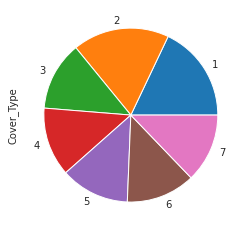

In [7]:
# There are 7 types of trees in the forest district.
print(tree.Cover_Type.value_counts())
tree.Cover_Type.value_counts().plot.pie()

In [8]:
Soil_Type_Fields = ['Soil_Type_'+ str(i) for i in range(1,41)]
Soil_Type_Fields

['Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_40']

In [9]:
train_Soil_Type = tree[Soil_Type_Fields]
train_Soil_Type['Soil_Type_'] = train_Soil_Type.idxmax(axis = 1)
train_Soil_Type['Soil_Type_']
# 40 a yakın toprak tipi olduğu için bunların dağılımlarına bakalım

0        Soil_Type_33
1        Soil_Type_23
2        Soil_Type_23
3        Soil_Type_23
4        Soil_Type_40
             ...     
38995    Soil_Type_40
38996    Soil_Type_38
38997    Soil_Type_40
38998    Soil_Type_29
38999    Soil_Type_38
Name: Soil_Type_, Length: 39000, dtype: object

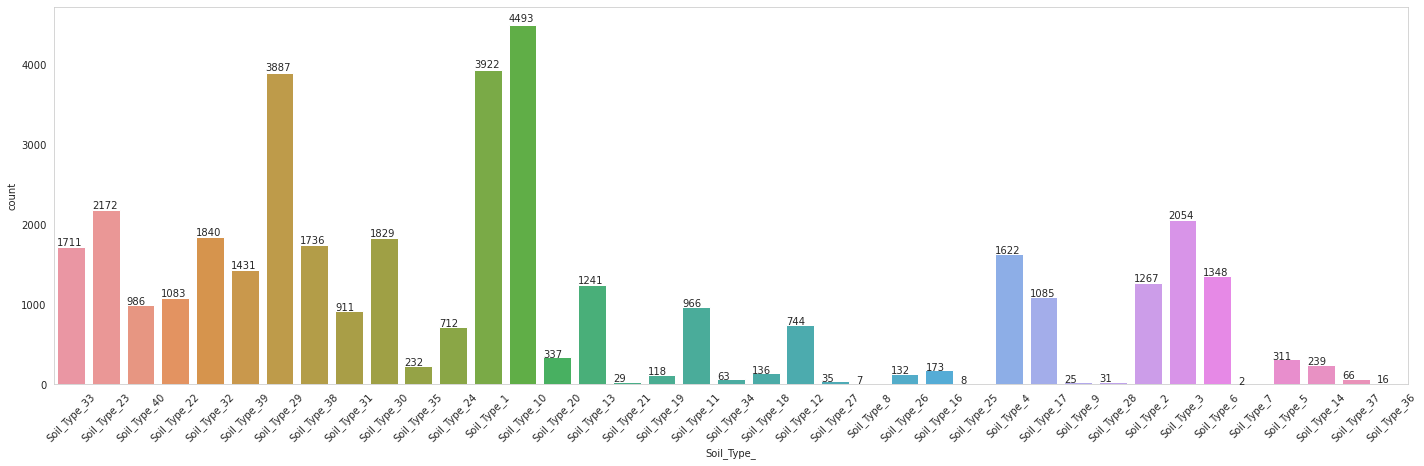

In [10]:
plt.figure(figsize=(20,6))
ax=sns.countplot(train_Soil_Type['Soil_Type_'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
plt.tight_layout()
plt.grid(axis="y")
plt.xticks(rotation=45);

#### Since my model cannot learn, I will drop columns with less than 1500 observations.

In [11]:
# 1500 ün altında olanları atalım. Etkisinin olmayacağını düşünüyoruz. Datanın insight elde edeceğini düşünmüyoruz
drop_soil_type=["Soil_Type_32","Soil_Type_23","Soil_Type_17","Soil_Type_26","Soil_Type_19","Soil_Type_35","Soil_Type_21","Soil_Type_8","Soil_Type_28","Soil_Type_37","Soil_Type_16","Soil_Type_25","Soil_Type_9","Soil_Type_36","Soil_Type_7","Soil_Type_15"]

# 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [12]:
# There is no missing values
tree.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [13]:
# SVM için outlierlar önemli. O yüzden outlierları atacağız. Atmadan da 2 tane df oluşturup yapabiliriz istersek

In [14]:
# to get list of continious features
numeric = []

for col in tree.columns:
    if tree[col].nunique() > 7 : numeric.append(col)
print(numeric)

# unique değeri 7 den fazla olanları nümerik olarak değerlendireceğiz

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


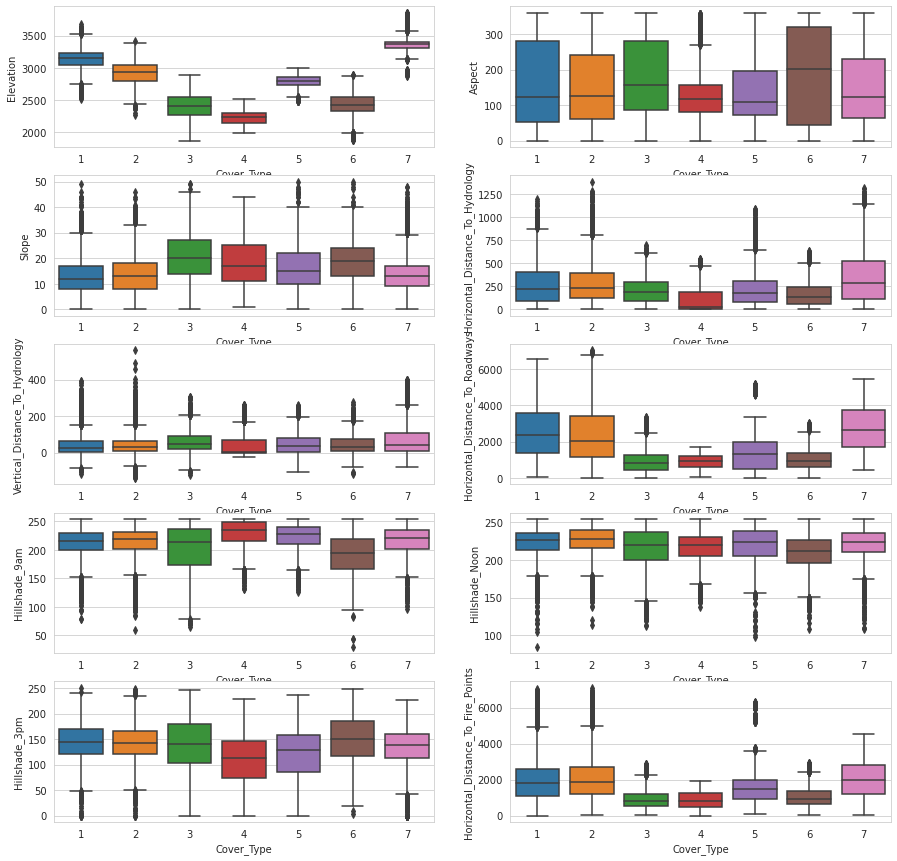

In [15]:
# Visually examine numeric features for outliers with boxplot for each class
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = tree[numeric[counter]] , x = tree["Cover_Type"], ax=ax[i,x])
        counter +=1
        
# Her bir feature ile alakalı 7 sınıftaki outlier değerleri görüyoruz(Buradaki 7 sınıf "Cover_type" ın unique değerleri/sınıfları)

In [16]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction
# we find the outliers for features without consideration of class distinction
# Interquartile Range 

# Outlierlara sınıf bazında değilde toptan yaklaşım yapacağız

def detect_outliers(df, col_name,k=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(k*IQR)
    lower_limit = first_quartile-(k*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


# Eğer değerimiz alt limitten küçükse veya üst limitten büyükse outlier sayısını , alt_limit i ve üst limiti döndürsün

**Let's see how many outliers are there of each Continuous Columns**

In [17]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(tree, col,3)[0]} \nupper:{detect_outliers(tree, col,3)[1]}\
        \noutlier:{detect_outliers(tree, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(tree, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)  

# Nümerik featureları for da döndürüp
# 3*IQR ın üstündeki ve altındaki değerler IQR olarak dönecek ve  out_cols listesine eklenecek(Altta atılacak)(Yukardaki fonksiyonda k=3)

# Outlier olan sütunlar :
# ['Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']

Elevation
lower:259.0 
upper:5278.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-527.0 
upper:852.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-23.0 
upper:54.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-740.0 
upper:1143.0        
outlier:91
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-214.0 
upper:297.0        
outlier:158
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-4205.75 
upper:7444.0        
outlier:0
*-*-*-*-*-*-*
Hillshade_9am
lower:79.0 
upper:352.0        
outlier:12
*-*-*-*-*-*-*
Hillshade_Noon
lower:123.0 
upper:319.0        
outlier:34
*-*-*-*-*-*-*
Hillshade_3pm
lower:-69.0 
upper:344.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-3165.0 
upper:6005.0        
outlier:309
*-*-*-*-*-*-*
['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


### Deal with Outliers


#### I will drop all rows which contain outliers in these 7 colums above

#### *ii. Drop Outliers*

In [18]:
out_cols

['Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

In [19]:
tree1 = tree.copy()

In [20]:
###### We have decided to drop outliers over 3 iqr####
for col in out_cols:
    tree1 = tree1[(tree1[col] > detect_outliers(tree1, col)[0])
             & (tree1[col] < detect_outliers(tree1, col)[1])]

In [21]:
tree.shape

(39000, 55)

In [22]:
tree1.shape

(32864, 55)

In [23]:
tree.shape[0]- tree1.shape[0]  # droping 48819 outlier observation

6136

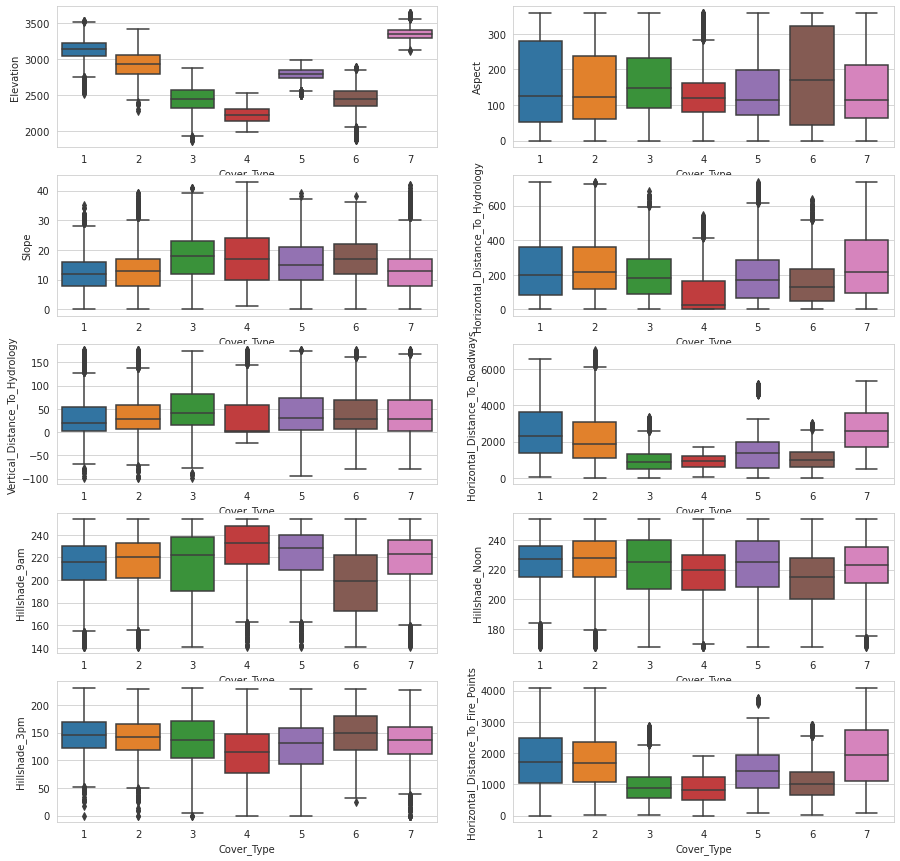

In [24]:
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = tree1[numeric[counter]] , x = tree1["Cover_Type"], ax=ax[i,x],whis=1.5)
        counter +=1
        
# Hala outlier değerler var çünkü IQR değerleri sürekli değiştiği için(Genel için bir atma işlemi yaptığımız için)

In [25]:
tree1 = tree1.reset_index(drop=True)  # Bazı satırlar gitti. Bu yüzden indexleri resetliyoruz

In [26]:
tree1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,3176,53,19,624,128,1620,227,195,94,3342,...,0,1,0,0,0,0,0,0,0,1
1,3221,77,11,626,46,4076,234,220,117,2761,...,0,0,0,0,0,0,0,0,0,1
2,3237,302,9,495,53,371,194,236,181,1784,...,0,0,0,0,0,0,0,0,0,1
3,2965,83,28,0,0,1061,245,181,46,1584,...,0,1,0,0,0,0,0,0,0,1
4,3157,330,10,108,8,1416,196,228,171,433,...,0,0,0,0,0,0,0,0,0,1




```
# This is formatted as code
```

#### My target column is `Cover_Type`. So let's take a close look at this column.

In [27]:
for i in range(1,8) :
    print("the shape of the value of", i, tree1[tree1["Cover_Type"] == i].shape)
    
# Outlierları attıktan sonra sınıfların sayıları

the shape of the value of 1 (6002, 55)
the shape of the value of 2 (5663, 55)
the shape of the value of 3 (3989, 55)
the shape of the value of 4 (4760, 55)
the shape of the value of 5 (4331, 55)
the shape of the value of 6 (4261, 55)
the shape of the value of 7 (3858, 55)


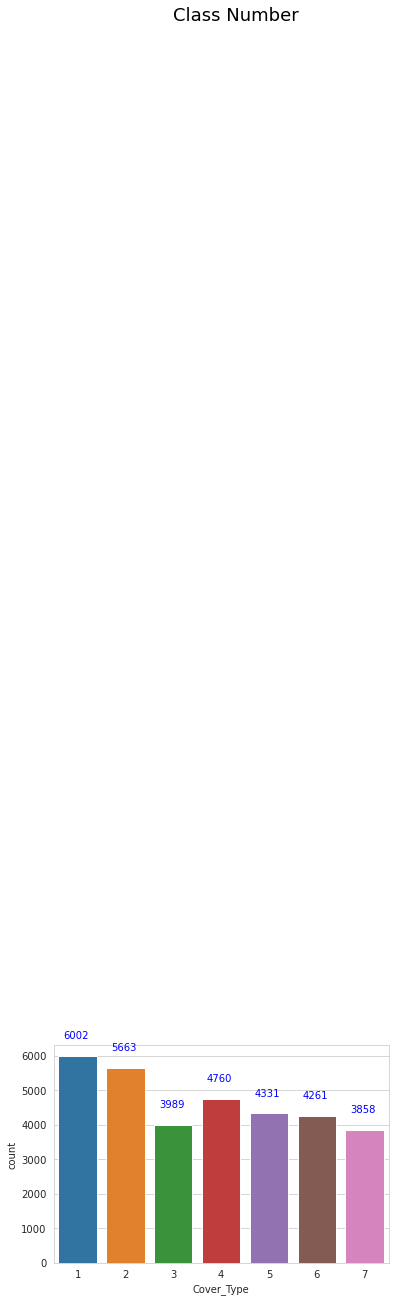

In [28]:
class_tree = tree1.groupby('Cover_Type').size()
#class_label = pd.DataFrame(class_tree,columns = ['Size'])
#plt.figure(figsize = (8,6))
#sns.barplot(x = class_label.index, y = 'Size', data = class_label)


sns.countplot(tree1.Cover_Type);
for i,val in enumerate(tree1["Cover_Type"].value_counts().sort_index().to_list()):
    plt.text(i-.3,val+500,str(val),color="blue")
    # print(i,val)
plt.text(2,36000,"Class Number",fontdict={"color":"Black","fontsize":18});

# Outlierları attıktan sonra sınıfların dağılımları

In [29]:
for i, number in enumerate(class_tree):
    percent = (number/class_tree.sum())
    print('Cover_Type', class_tree.index[i])
    print('%.2f'% percent)
    
# Outlierları attıktan sonra sınıfların oransal değerleri

Cover_Type 1
0.18
Cover_Type 2
0.17
Cover_Type 3
0.12
Cover_Type 4
0.14
Cover_Type 5
0.13
Cover_Type 6
0.13
Cover_Type 7
0.12


- We can see that we have balanced data (`Cover_Type`). But, additionally I would like to check the distribution of each class of ``Cover_Type`` in terms of percentages.

#### Now, let's take a closer look at correlation of continuous columns.

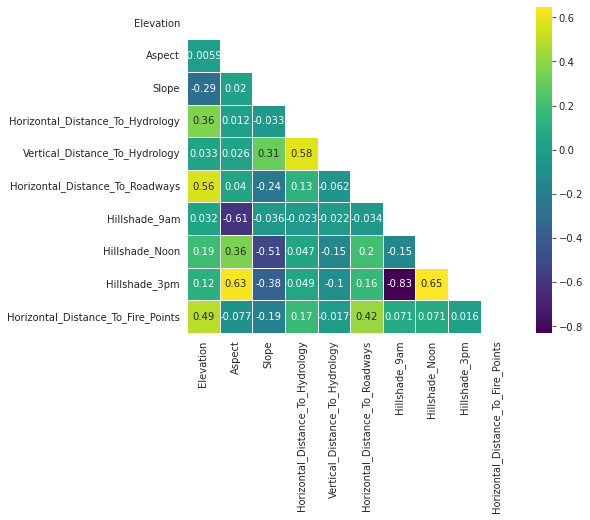

In [30]:
corr = tree1[numeric].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(8, 6))

sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

# Çok yüksek korelasyonlar görünmüyor. En fazlası -0.83

In [31]:
tree1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32864 entries, 0 to 32863
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           32864 non-null  int64
 1   Aspect                              32864 non-null  int64
 2   Slope                               32864 non-null  int64
 3   Horizontal_Distance_To_Hydrology    32864 non-null  int64
 4   Vertical_Distance_To_Hydrology      32864 non-null  int64
 5   Horizontal_Distance_To_Roadways     32864 non-null  int64
 6   Hillshade_9am                       32864 non-null  int64
 7   Hillshade_Noon                      32864 non-null  int64
 8   Hillshade_3pm                       32864 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  32864 non-null  int64
 10  Wilderness_Area_1                   32864 non-null  int64
 11  Wilderness_Area_2                   32864 non-null  int64
 12  Wild

In [32]:
tree1.to_csv("covtype_EDA.csv", index = False)  # 201000 tane veriyi csv ye kaydettik. Ara ara kaydetmekte fayda var. Tekrar dönmek isteyebiliriz diye

***
***

# 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.
- Lastly, I will drop unnecessary columns  'Soil_Type_32','Soil_Type_23','Soil_Type_17','Soil_Type_26','Soil_Type_19','Soil_Type_35','Soil_Type_21','Soil_Type_8','Soil_Type_28','Soil_Type_37','Soil_Type_16','Soil_Type_25','Soil_Type_9','Soil_Type_36','Soil_Type_7','Soil_Type_15' that I conclued previously.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [33]:
tree1["Hypo_Distance"] = (tree1["Horizontal_Distance_To_Hydrology"]**2 + tree1["Vertical_Distance_To_Hydrology"]**2)**.5
# Yatay ve düşey uzaklıklardan hipotenüsü hesapladık. Bu şekilde Hypo_Distance adında feature ürettik

In [34]:
tree1["Average_Dist_Road_Hydro"] = (tree1.Horizontal_Distance_To_Hydrology + tree1.Horizontal_Distance_To_Roadways)/2 
# Su yollarına yatay uzaklığı ile karayollarına yatay uzaklığın ortalamasını alıp. Bu şekilde Average_Dist_Road_Hydro adında feature ürettik

In [35]:
tree1["Average_Elevation_Hydro"] = (tree1.Elevation + tree1.Vertical_Distance_To_Hydrology) /2
# Rakım ve Su yollarına düşey uzaklık ortalamasını alıp. Bu şekilde Average_Elevation_Hydro adında bir feature ürettik

In [36]:
tree1.shape

(32864, 58)

In [37]:
tree1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

# Bu featureları drop ediyoruz çünkü bunlardan yeni feature ürettik

In [38]:
drop_soil_type # Yukarda 1500 ün altındaki toprak tiplerini çekmiştik

['Soil_Type_32',
 'Soil_Type_23',
 'Soil_Type_17',
 'Soil_Type_26',
 'Soil_Type_19',
 'Soil_Type_35',
 'Soil_Type_21',
 'Soil_Type_8',
 'Soil_Type_28',
 'Soil_Type_37',
 'Soil_Type_16',
 'Soil_Type_25',
 'Soil_Type_9',
 'Soil_Type_36',
 'Soil_Type_7',
 'Soil_Type_15']

In [39]:
for i in drop_soil_type:
    tree1.drop(i,axis=1,inplace=True)

# Model bunlardan öğrenemeyeceği için bu toprak tiplerini düşüyoruz

In [40]:
tree1.shape  # 17 columns düştü. 38 column kaldı

(32864, 38)

In [41]:
numeric = [ col for col in tree1.columns if tree1[col].nunique() > 7]
numeric
# Feature engineeringten sonra tekrar nümerik colonları tutalım. Bunları inceleyelim altta

['Aspect',
 'Slope',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Hypo_Distance',
 'Average_Dist_Road_Hydro',
 'Average_Elevation_Hydro']

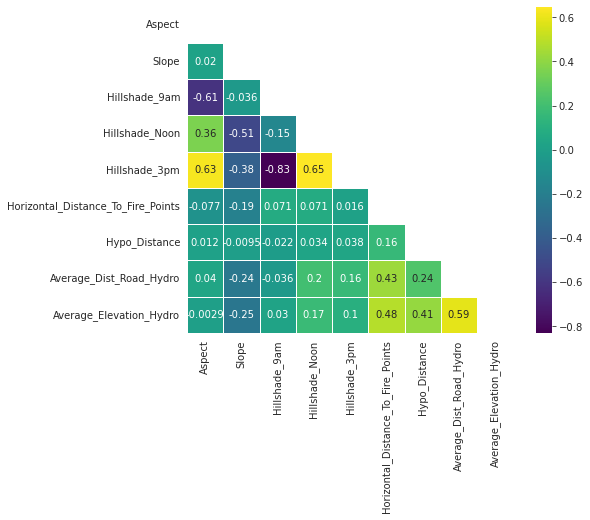

In [42]:
corr = tree1[numeric].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

# Yeni ürettiğimiz feature ların korelasyonlarına bakalım tekrar

In [43]:
tree1.to_csv("covtype_FE.csv", index = False)   # Feature enginneringli dosyayı da kaydediyorum. Kenarda dursun. covtype_FE(FE: Feature Engineerin)
# Ares Hoca: Böyle kaydederek ilerlemenizi tavsiye ederim

# EDA bitti modellemeye geçelim

# Class chat soru: soil_type gibi bize get_dummyli gelen featurelar varsa ben tree based modelleme yapacaksam bunları tek sütun haline çevirebilir miyiz hocam sonradan ordinalencoder yapmak için
# Orion Hoca: Evet yapabilirisniz  # Ares Hoca: Olabilir. O da bir yaklaşım. Deneyebilirsiniz
# Thread devamı : Bunun bir kodu var mı hocam yoksa bir def mi tanımlamamız gerekir
# Orion hoca: Bir kodu yok hazır hocam

# 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [44]:
# ! conda install -c conda-forge xgboost
# ! pip install xgboost

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from  xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [46]:
df = pd.read_csv("covtype_FE.csv")

In [47]:
df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_31,Soil_Type_33,Soil_Type_34,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,53,19,227,195,94,3342,0,0,1,0,...,0,1,0,0,0,0,1,636.992936,1122.0,1652.0
1,77,11,234,220,117,2761,1,0,0,0,...,0,0,0,0,0,0,1,627.687820,2351.0,1633.5
2,302,9,194,236,181,1784,0,1,0,0,...,0,0,0,0,0,0,1,497.829288,433.0,1645.0
3,83,28,245,181,46,1584,0,0,1,0,...,0,1,0,0,0,0,1,0.000000,530.5,1482.5
4,330,10,196,228,171,433,0,0,1,0,...,0,0,0,0,0,0,1,108.295891,762.0,1582.5


In [48]:
df.shape

(32864, 38)

In [49]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

# stratify=y : ufak bir fark olduğu için dengeli olsun diye yazdık

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [51]:
scaler = MinMaxScaler() # one-hot-encoder lı featurelar olduğu için Scale olarak minmaxscaler kullandık

In [52]:
from sklearn.ensemble import BaggingClassifier
modelSVM = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.05,n_estimators=5) 
# we drop the model computional complexity with bagging and that gives us better time and better accuracy
#  max_samples=.05 : 200.000 satırlık verinin 10.000 i ile çalışacağız
# n_estimators=5 : 5 tane support vektor machine kullanacağız

In [53]:
from sklearn.pipeline  import Pipeline
modelSVM = Pipeline([("scaler",scaler),("SVM",modelSVM)]) # pipeline is used to combine the steps of the model

In [54]:
modelSVM.fit(X_train , y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVM',
                 BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                   max_samples=0.05, n_estimators=5,
                                   n_jobs=-1))])

In [55]:
y_pred_test = modelSVM.predict(X_test)
y_pred_train = modelSVM.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.59      0.74      0.66      1801
           2       0.54      0.46      0.49      1699
           3       0.54      0.54      0.54      1197
           4       0.81      0.86      0.83      1428
           5       0.57      0.57      0.57      1299
           6       0.63      0.57      0.60      1278
           7       0.85      0.73      0.79      1158

    accuracy                           0.64      9860
   macro avg       0.65      0.64      0.64      9860
weighted avg       0.64      0.64      0.64      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.59      0.72      0.65      4201
           2       0.55      0.47      0.50      3964
           3       0.53      0.54      0.54      2792
           4       0.82      0.84      0.83      3332
           5       0.57      0.57      0.5

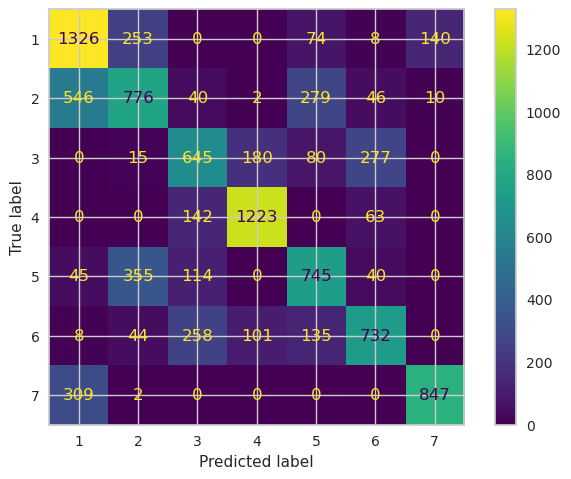

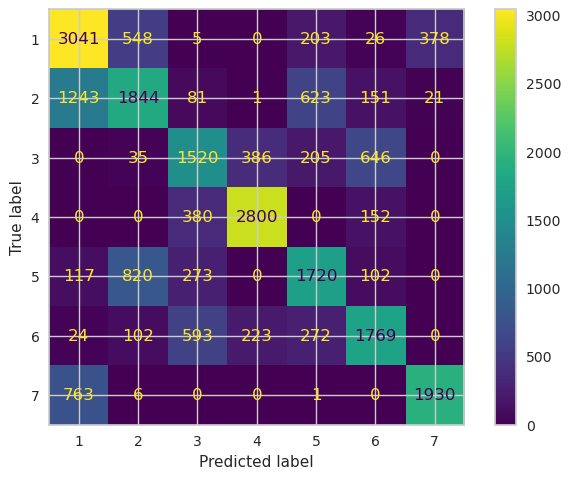

In [56]:

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelSVM, X_test, y_test);

print("\n"*3, "-*"*30)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelSVM, X_train, y_train);

# Balanced bir durum olduğu için "accuracy" üzerinden gideceğiz
# 0.70 testte , 0.70 train de. Overfitting durumu görünmüyor

# Alttaki şekil confusion matrix .. 1 sınıfına ait olan sınıfı 1 olarak tahmin etmesi 5179
# .. gerçekte 2 sınıfına ait olan sınıfı 1 olarak tahmin edilen değer 1862 ... vs vs

#### SVM Gridsearch

In [57]:
param_grid = {
    'SVM__base_estimator__C': np.linspace(0.01,1, 3),
}

In [58]:
from sklearn.model_selection import GridSearchCV
model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.05,n_estimators=5,random_state=6)
modelSVM = Pipeline([("scaler",scaler),("SVM",model)])
svm_model_grid = GridSearchCV(modelSVM,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",  # Ares Hoca: Burada bu skora bakalım dedik. Zaten skor değerleri yakın. 
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

# Ares Hoca: Sınıfların dağılımları dengeli olduğu için f1 macroya, accuracy ye ve weigted avg a bakılabilir. Dengesizlerde f1 weighted avg a bakmak daha mantıklı
# Başka parametre değerlerine de bakabiliriz

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ........................SVM__base_estimator__C=0.01; total time=   2.6s
[CV] END ........................SVM__base_estimator__C=0.01; total time=   2.7s
[CV] END ........................SVM__base_estimator__C=0.01; total time=   2.9s
[CV] END ........................SVM__base_estimator__C=0.01; total time=   2.9s
[CV] END .......................SVM__base_estimator__C=0.505; total time=   2.2s
[CV] END .......................SVM__base_estimator__C=0.505; total time=   2.6s
[CV] END .......................SVM__base_estimator__C=0.505; total time=   2.8s
[CV] END ........................SVM__base_estimator__C=0.01; total time=   3.1s
[CV] END .......................SVM__base_estimator__C=0.505; total time=   1.9s
[CV] END .......................SVM__base_estimator__C=0.505; total time=   2.7s
[CV] END .........................SVM__base_estimator__C=1.0; total time=   2.3s
[CV] END .........................SVM__base_estim

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM',
                                        BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                                          max_samples=0.05,
                                                          n_estimators=5,
                                                          n_jobs=-1,
                                                          random_state=6))]),
             n_jobs=-1,
             param_grid={'SVM__base_estimator__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [59]:
svm_model_grid.best_params_  # Default değer gelmiş

{'SVM__base_estimator__C': 1.0}

In [60]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVM',
                 BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                   max_samples=0.05, n_estimators=5, n_jobs=-1,
                                   random_state=6))])

In [61]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.59      0.65      0.62      1801
           2       0.50      0.53      0.51      1699
           3       0.61      0.48      0.54      1197
           4       0.75      0.93      0.83      1428
           5       0.57      0.56      0.56      1299
           6       0.64      0.58      0.60      1278
           7       0.85      0.69      0.76      1158

    accuracy                           0.63      9860
   macro avg       0.64      0.63      0.63      9860
weighted avg       0.63      0.63      0.63      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.58      0.64      0.61      4201
           2       0.50      0.52      0.51      3964
           3       0.62      0.47      0.54      2792
           4       0.75      0.92      0.83      3332
           5       0.58      0.57      0.5

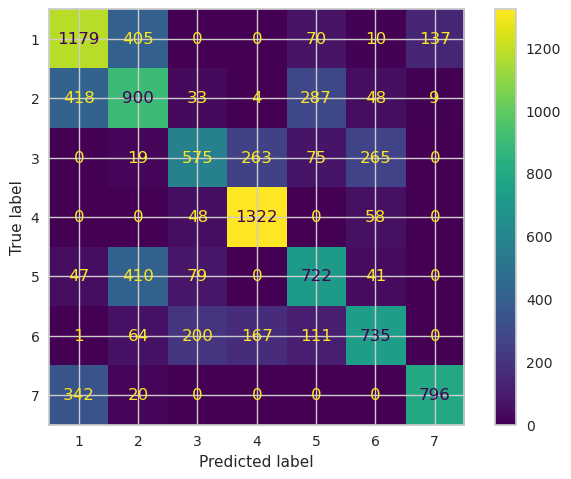

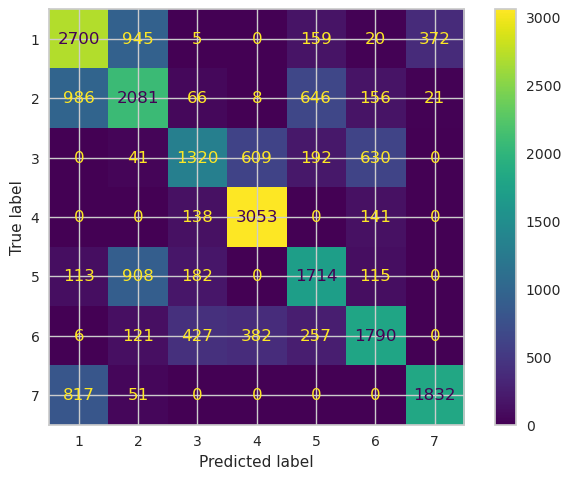

In [62]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(svm_model_grid, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model_grid, X_train, y_train);

# hyperparametre optimizasyonu sonrası sonuçlar(Sonuçlar aynı çünkü zaten C default değer geldi)

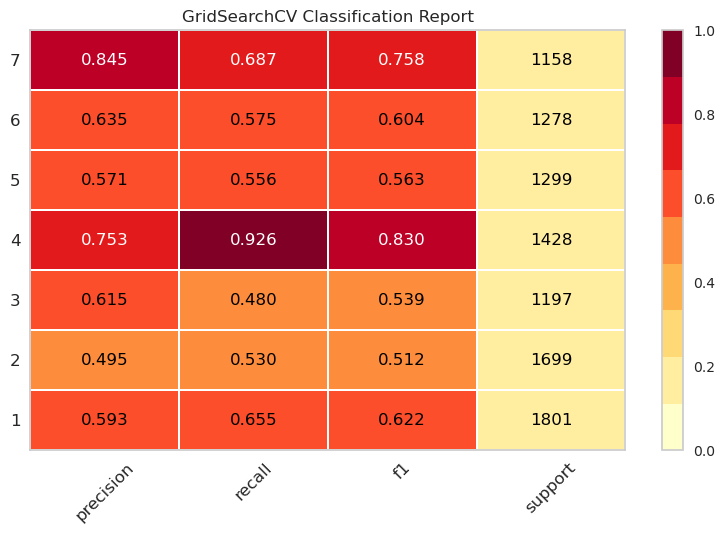

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [63]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(svm_model_grid, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()
# Ares Hoca: Bu da farklı bir gösterim. Bu görseli de çalışmalarda kullanabilirsiniz

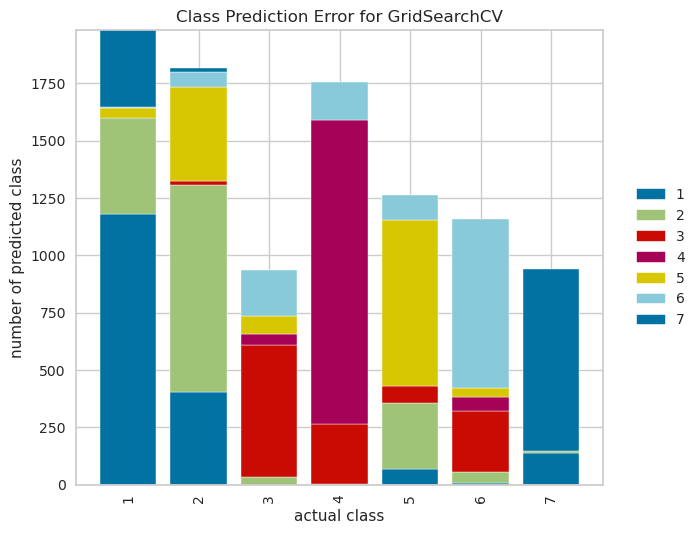

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [64]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# 1. barda Modelim 2 sınıfı ile 1 sınıfını karıştırıyor biraz
# 2. barda model 5. sınıfı 1. sınıfı ve 1-2 ağacı daha karıştırıyor
# Son barda renkler benziyor ama 1. sınıf ve 7. sınıf var orada mavi ile bir de yeşil(2.sınıf)

#### for comparing

In [65]:
y_pred_test = svm_model_grid.predict(X_test)
SVM_tuned_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_tuned_f1_test = f1_score(y_test, y_pred_test, average='macro')
# Bunları aşağıda kullanmak için bir değişkene atadık

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [66]:
modelTree = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.05,n_estimators=10)

modelTree.fit(X_train , y_train)

# max_samples=.05 : modelin 0.05 i 10000 veri ile çalışacağız
# n_estimators=10 : 10 tane ağaç ile çalışacağız

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.05,
                  n_jobs=-1)

In [67]:
y_pred_test = modelTree.predict(X_test)
y_pred_train = modelTree.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.67      0.67      0.67      1801
           2       0.65      0.52      0.58      1699
           3       0.72      0.68      0.70      1197
           4       0.86      0.97      0.91      1428
           5       0.74      0.81      0.77      1299
           6       0.75      0.71      0.73      1278
           7       0.81      0.91      0.86      1158

    accuracy                           0.74      9860
   macro avg       0.74      0.75      0.75      9860
weighted avg       0.74      0.74      0.74      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.70      0.70      0.70      4201
           2       0.69      0.58      0.63      3964
           3       0.76      0.71      0.73      2792
           4       0.89      0.97      0.93      3332
           5       0.75      0.83      0.7

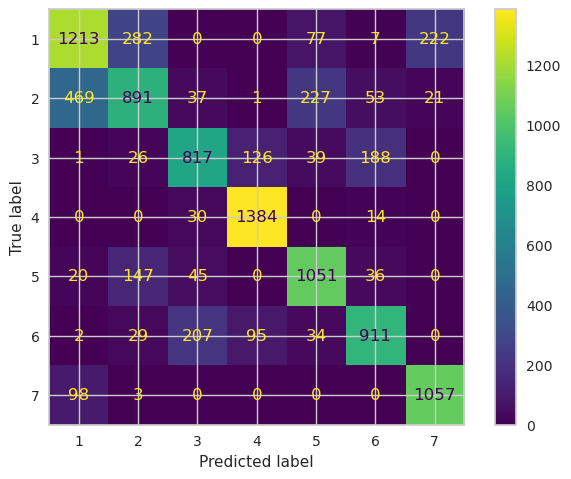

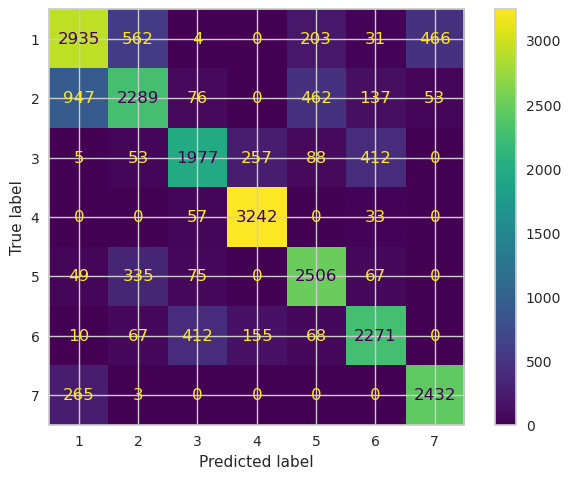

In [68]:

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelTree, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelTree, X_train, y_train);

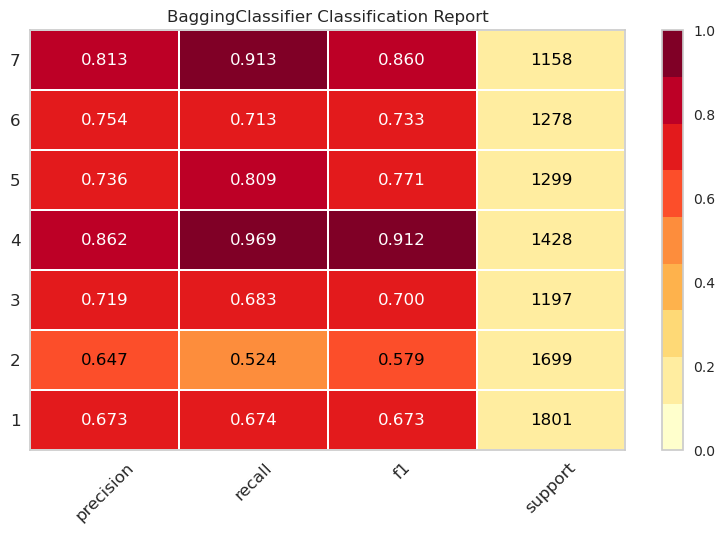

<AxesSubplot:title={'center':'BaggingClassifier Classification Report'}>

In [69]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(modelTree, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

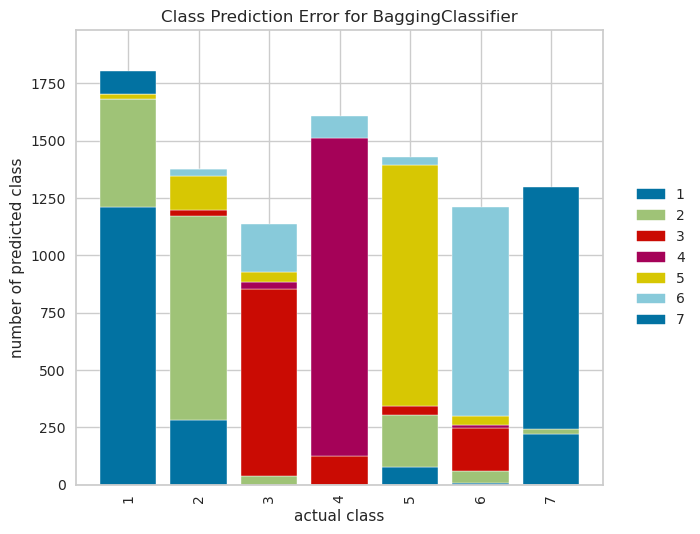

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [70]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [71]:
# aşağıda tree base modeller kullanacağımız için grid search yapmadık

#### for comparing

In [72]:
y_pred_test = modelTree.predict(X_test)
modelTree_accuracy_test = accuracy_score(y_test, y_pred_test)
modelTree_f1_test = f1_score(y_test, y_pred_test, average='macro')

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [73]:
# Yani decision tree de 10 ağaç kullanınca zaten RF olmadı mı ?
# RF örneklemleri ve örneklemlerin içerisindeki featureları rasgele seçiyor. Üstteki decision tree den farkı bu

In [74]:
rfc = RandomForestClassifier(n_estimators=100, max_samples=.05)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.05)

In [75]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.72      0.74      0.73      1801
           2       0.73      0.58      0.64      1699
           3       0.80      0.68      0.74      1197
           4       0.88      0.97      0.92      1428
           5       0.79      0.89      0.83      1299
           6       0.76      0.83      0.79      1278
           7       0.87      0.92      0.90      1158

    accuracy                           0.79      9860
   macro avg       0.79      0.80      0.79      9860
weighted avg       0.79      0.79      0.79      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.77      0.77      0.77      4201
           2       0.78      0.65      0.71      3964
           3       0.84      0.72      0.77      2792
           4       0.90      0.97      0.94      3332
           5       0.82      0.90      0.8

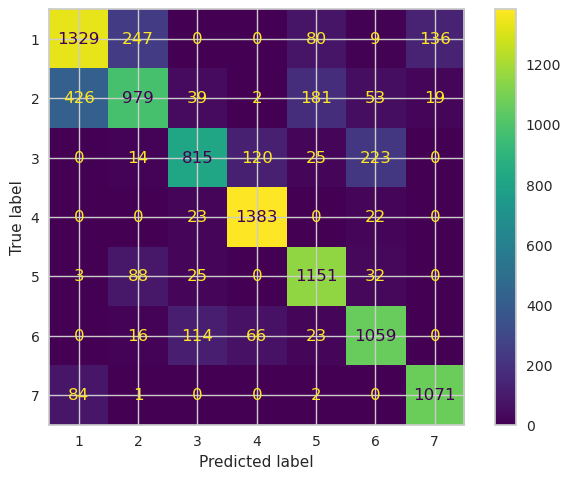

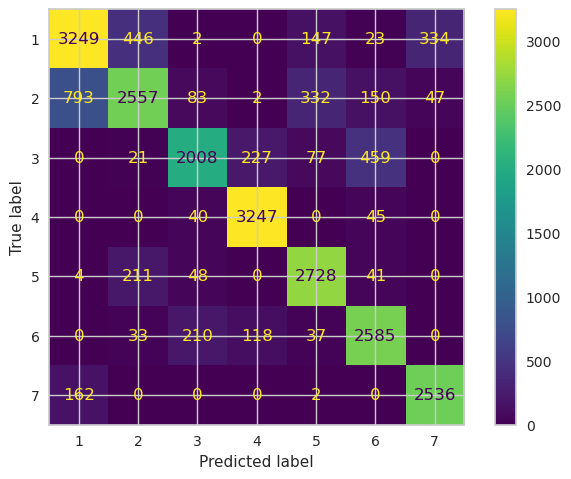

In [76]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rfc, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rfc, X_train, y_train);

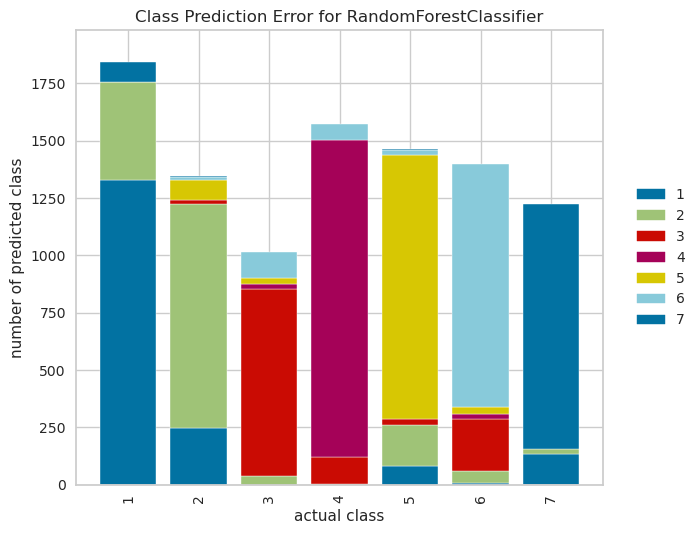

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [77]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### RF GridsearchCV

In [78]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16,None],
             'min_samples_split':[2,6,10],
             }

# Ares hoca: Buradaki parametrelerle çok oynadım. Uç değerler geldi. Tekrar oynadım vs. Bu ciddi işlem maliyeti getriyor

In [79]:
rf_model = RandomForestClassifier(max_samples=.05)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",  # Ares Hoca: f1 macroya da bakabilirdik. Farkeden bir şey yok
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.4s[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.4s

[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_split=2, n_estimato

GridSearchCV(estimator=RandomForestClassifier(max_samples=0.05), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16, None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [80]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 200}

In [81]:
rf_grid_model.best_estimator_

RandomForestClassifier(max_samples=0.05, n_estimators=200)

In [82]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.73      0.74      0.73      1801
           2       0.74      0.58      0.65      1699
           3       0.79      0.68      0.73      1197
           4       0.88      0.98      0.92      1428
           5       0.78      0.88      0.83      1299
           6       0.76      0.81      0.79      1278
           7       0.87      0.92      0.90      1158

    accuracy                           0.79      9860
   macro avg       0.79      0.80      0.79      9860
weighted avg       0.79      0.79      0.79      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.77      0.78      0.77      4201
           2       0.79      0.64      0.71      3964
           3       0.84      0.73      0.78      2792
           4       0.90      0.98      0.94      3332
           5       0.82      0.90      0.8

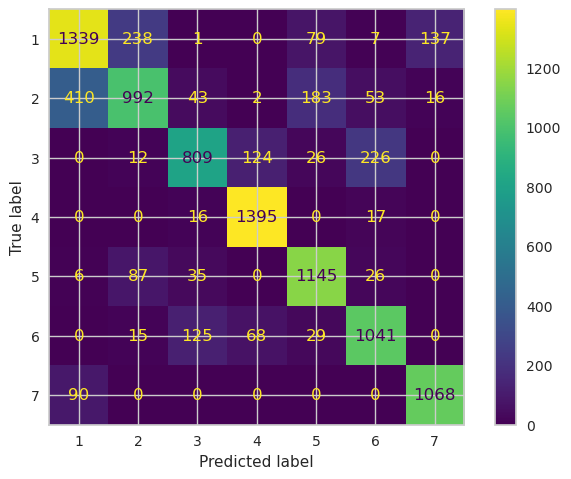

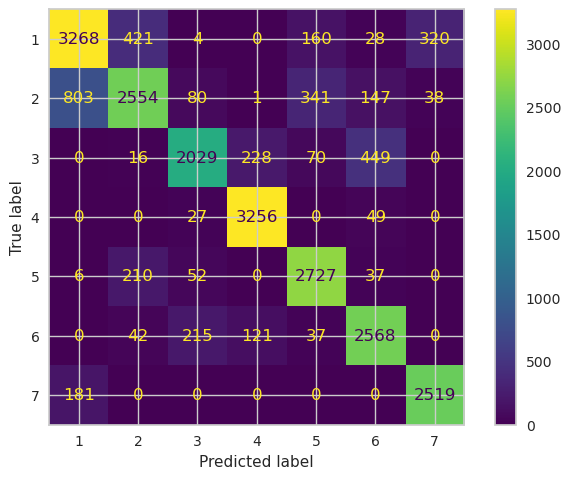

In [83]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_grid_model, X_train, y_train);

# Tune edilmiş(hiperparametre optimizasyonlu) model ile skorumuz
# Çok değişen bir şey olmadı. Parametrelerle oynanabilir

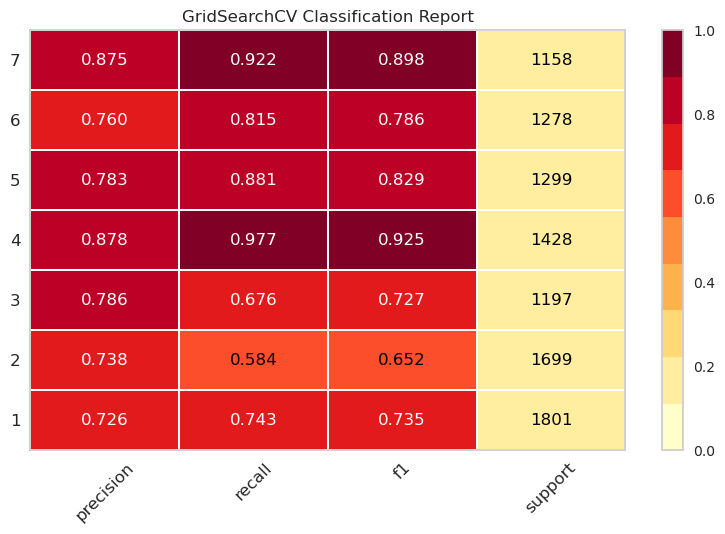

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [84]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf_grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

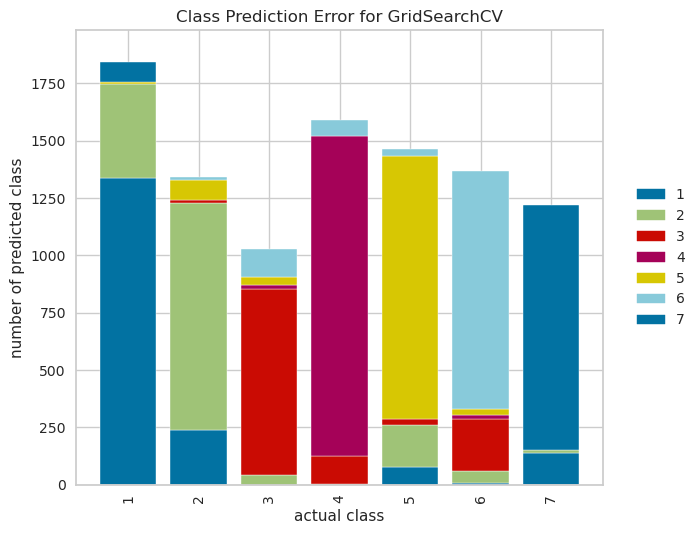

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [85]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### for comparing

In [86]:
rfc_tuned_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_tuned_f1_test = f1_score(y_test, y_pred_test, average='macro')

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [87]:
xgb_classifier = XGBClassifier(subsample=.05)
xgb_classifier.fit(X_train , y_train)

[21:41:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.05, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [88]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.72      0.71      0.71      1801
           2       0.66      0.61      0.63      1699
           3       0.75      0.73      0.74      1197
           4       0.93      0.97      0.95      1428
           5       0.83      0.87      0.85      1299
           6       0.78      0.77      0.77      1278
           7       0.89      0.92      0.91      1158

    accuracy                           0.79      9860
   macro avg       0.79      0.80      0.80      9860
weighted avg       0.78      0.79      0.79      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.80      0.79      0.79      4201
           2       0.77      0.72      0.75      3964
           3       0.84      0.83      0.84      2792
           4       0.97      0.98      0.97      3332
           5       0.88      0.93      0.9

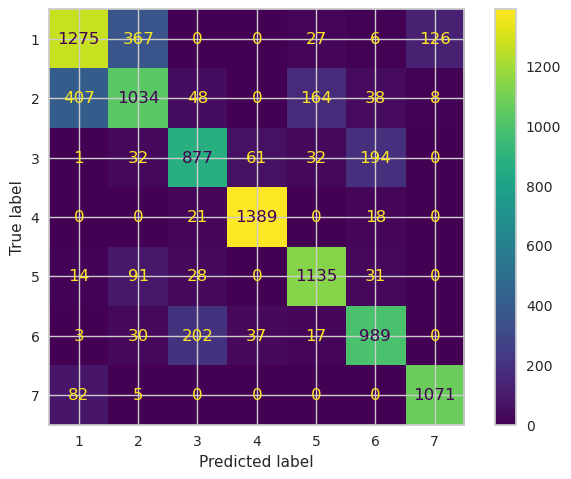

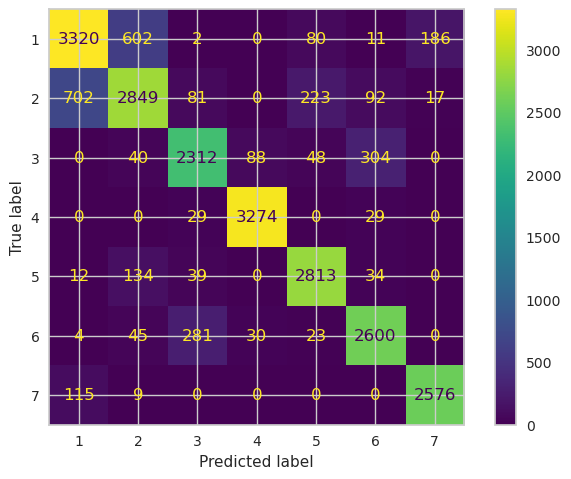

In [89]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

# Skorlar düşük geldi ama yakın çıktı. XGboost overfit ile mücadele ediyordu

#### XGB Gridsearch

In [90]:
xgb_model =   XGBClassifier()

In [91]:
param_grid = {"n_estimators":[100,200],'max_depth':[5,7],
             "subsample":[0.05],}

In [92]:
xgb_model =   XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model,
                             param_grid,
                             verbose=1,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

xgb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with

[21:41:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:57] WARNING: /tmp/abs_40obctay9q/croots/re

/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:42:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:43:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

[21:43:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:43:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

[21:44:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:44:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:44:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:45:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:46:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:46:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:46:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:46:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

[21:47:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/harun/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:48:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:49:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.05]},
             scoring='accuracy', verbose=1)

In [93]:
xgb_grid_model.best_params_

{'max_depth': 7, 'n_estimators': 200, 'subsample': 0.05}

In [94]:
xgb_grid_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.05, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [95]:
y_pred_test = xgb_grid_model.predict(X_test)
y_pred_train = xgb_grid_model.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.72      0.71      0.72      1801
           2       0.66      0.65      0.66      1699
           3       0.79      0.76      0.78      1197
           4       0.94      0.98      0.96      1428
           5       0.86      0.88      0.87      1299
           6       0.81      0.80      0.81      1278
           7       0.89      0.93      0.91      1158

    accuracy                           0.80      9860
   macro avg       0.81      0.82      0.81      9860
weighted avg       0.80      0.80      0.80      9860




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.87      0.84      0.85      4201
           2       0.83      0.82      0.82      3964
           3       0.91      0.89      0.90      2792
           4       0.98      0.99      0.98      3332
           5       0.93      0.95      0.9

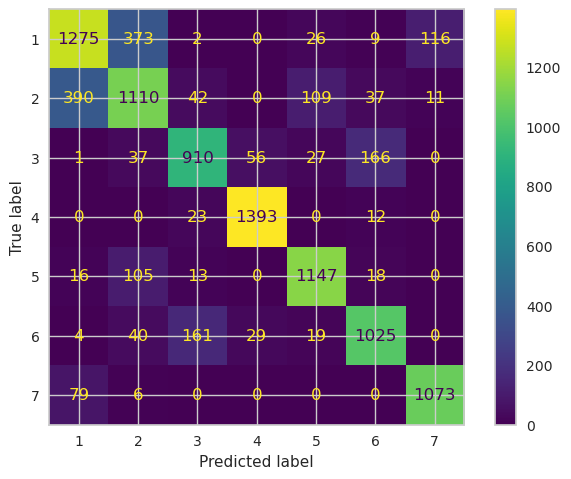

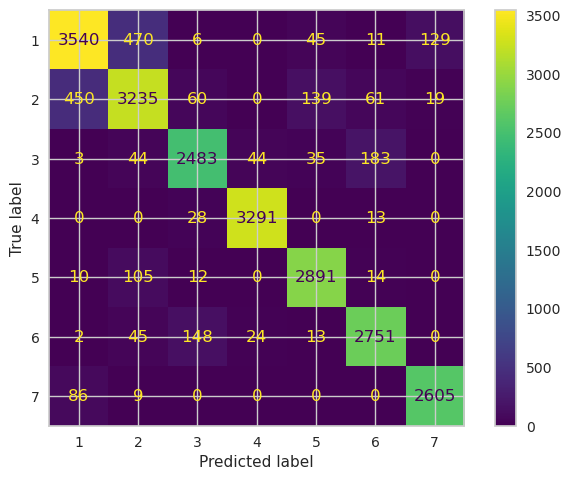

In [96]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_grid_model, X_train, y_train);

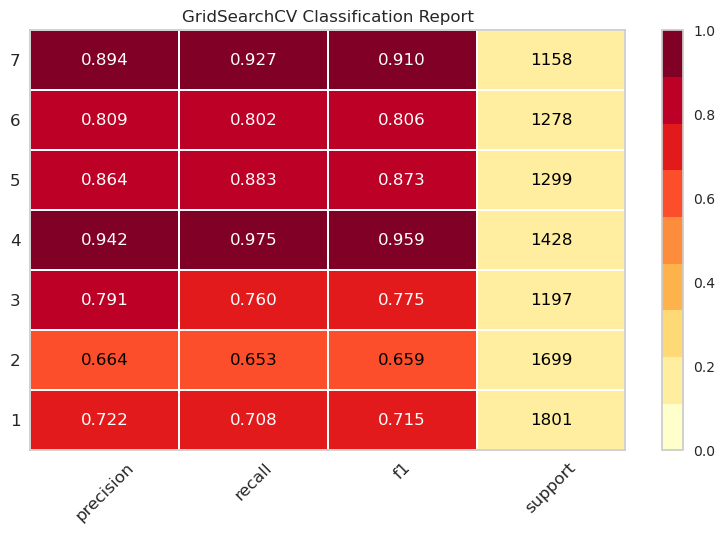

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [97]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(xgb_grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

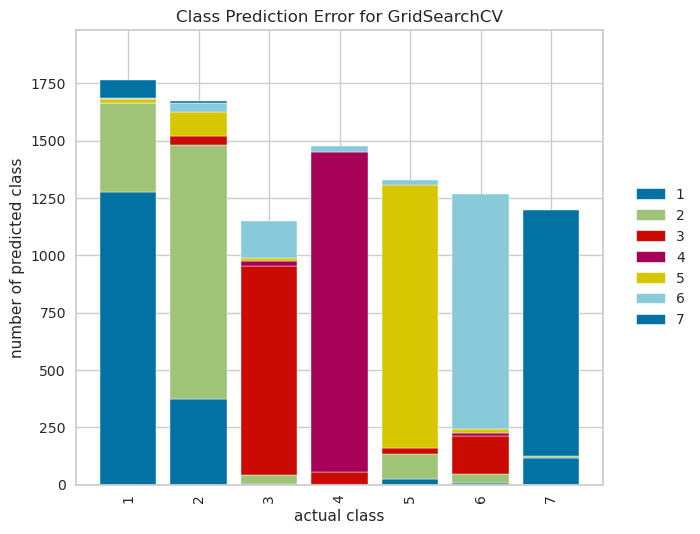

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [98]:
visualizer = ClassPredictionError(xgb_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### for comparing

In [99]:
y_pred_test = xgb_grid_model.predict(X_test)
xgb_tuned_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_tuned_f1_test = f1_score(y_test, y_pred_test, average='macro')

# Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

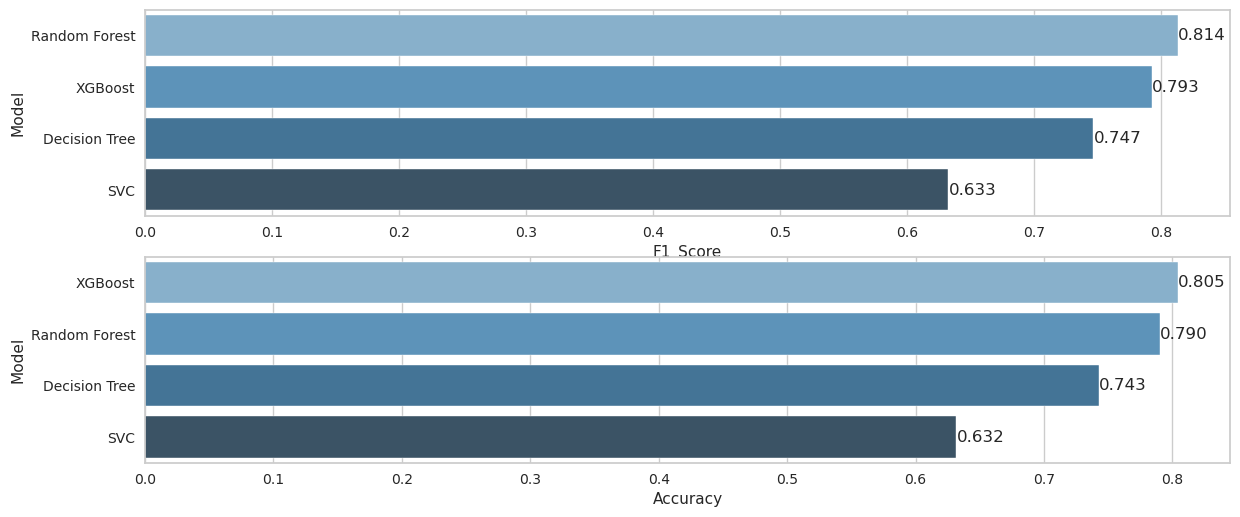

In [100]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_tuned_accuracy_test, rfc_tuned_accuracy_test, xgb_tuned_accuracy_test, modelTree_accuracy_test],
                       "F1_Score": [SVM_tuned_f1_test, xgb_tuned_f1_test, rfc_tuned_f1_test,modelTree_f1_test]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,6))
plt.subplot(211)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)



plt.subplot(212)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

In [101]:
# F1 ve accuracy skorlarını aldık
# F1 de RF daha iyi
# Accuracy de XGboost un daha iyi olduğu görülüyor
# Son modellemeyi XGboost ile yapıp devam edebiliriz
# 10.000 data ile Xgboost da güzel skorlar alıyoruz. Mesela outlier ları atmadan bile 250.000 satırla Xgboost u deneyebilirsiniz

In [102]:
# Tüm data ile çalışmaktansa subsample la çalışıp en iyi model şudur diyip sonra tüm data ile skorlarınızı alabilirsiniz